# Lab 9. Bayesian analysis and Monte Carlo simulation
#### Computational Methods for Geoscience - Fall 2023
#### Instructor: Eric Lindsey

Due: Nov. 9, 2023

---------

In [1]:
# some useful imports and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize

# new this week - you may need to install these, using whichever method works for your computer.
import emcee
import corner

%config InlineBackend.figure_format = 'retina' # better looking figures on high-resolution screens
# automatically reload modules when running, otherwise jupyter does not notice if our functions have changed
%load_ext autoreload
%autoreload 2

## Mystery data

We have some data that seem to follow a sinusoidal function plus a linear trend. Not knowing much about the data, suppose we hypothesize that it can be fit by the following 5-parameter function:

$ y(x) = a\sin(bx+c) + dx + e $

Below, we have tried to fit this with scipy curve_fit. The results are not promising...

Scipy curve_fit found: a,b = [-3.18405498  2.76054131 -4.53757396  6.13137069  7.71590248]
Covariances:
 [[ 0.9997514  -0.02872103  0.04679058 -0.16878766  0.20806097]
 [-0.02872103  0.04884787 -0.12768717 -0.02808373  0.11862073]
 [ 0.04679058 -0.12768717  0.42053868  0.11425519 -0.41813509]
 [-0.16878766 -0.02808373  0.11425519  0.255173   -0.63524613]
 [ 0.20806097  0.11862073 -0.41813509 -0.63524613  2.06174842]]


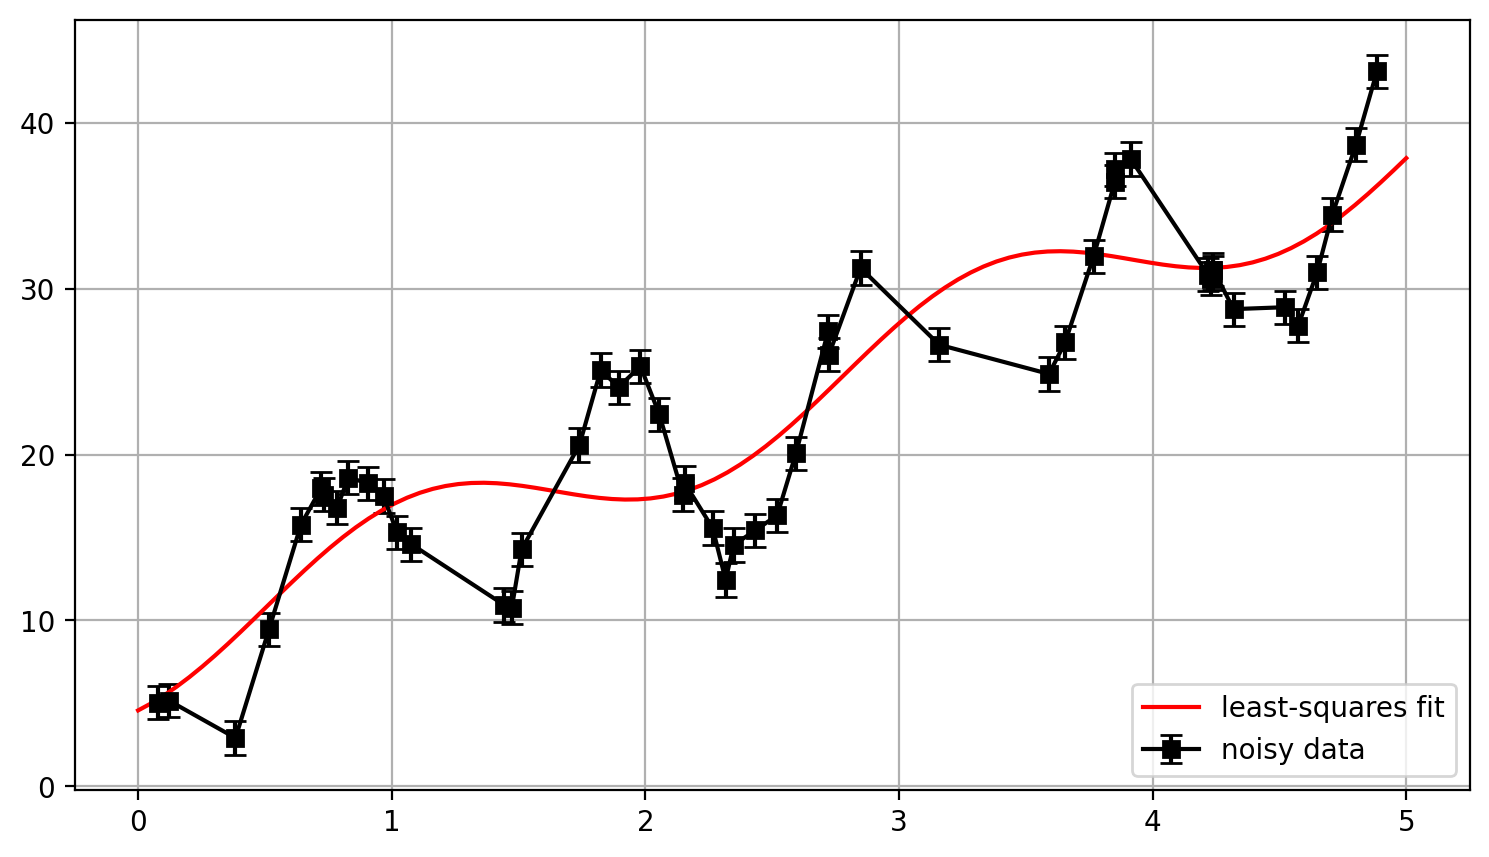

In [2]:
# load the data from the csv file

data = pd.read_csv('mystery_data.csv')
x=np.array(data['x'])
y=np.array(data['y'])
yerr=np.array(data['yerr'])

# create our "hypothesized" model

# define our model here - in this case, just a line. 
def my_model(x,*params):
    # this first line "unpacks" the list [params] into elements. 
    # An easier way to pass many variables to a function.
    a,b,c,d,e = params
    # Compute the model, and return the y values
    model = a*np.sin(b*x + c) + d*x + e
    return model

# here, p0 is the 'initial guess' for this method. 
# m is the model output, and mcov is the model covariance, or uncertainties.
m,mcov = scipy.optimize.curve_fit(my_model,x,y,p0=np.ones(5))
print('Scipy curve_fit found: a,b =',m)
print('Covariances:\n',mcov)

# create a new, evenly sampled x array for plotting the "fitted" function
x_plot = np.linspace(0,5,100)

# to get the predicted y-values, we can just call our function with the 
# model parameters determined by scipy.
lsq_model = my_model(x_plot,*m) 

plt.figure(figsize=(9,5))
plt.errorbar(x,y,yerr=yerr,fmt='-ks',label='noisy data',capsize=4)
plt.plot(x_plot,lsq_model, '-r', label='least-squares fit')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Assignment: fit the data with Monte Carlo

We should be able to do much better than this with Monte Carlo sampling! 

Modify the example code from the notes to estimate the five parameters that were used to generate these data.

Some things to think about:

- You will need to write 3 functions: the log-likelihood function, the log-prior function, and the log-probability function. Most of these will be nearly the same as in the line-fitting example.

- Think about what starting locations you give the model for each parameter, and the number of samples to generate for your sampler. If you are having trouble, try re-running your sampler using the best-fitting parameters from the first run as your initial guess for the second run.

- Think about the prior distribution - a uniform range is probably fine, but what is the range? Think about this particularly for parameter 'c', the phase shift - if you make the range too large you could get multiple solutions!

Your final results should contain a plot of the best-fitting solution to the data, and the probability distribution function plots showing nice shapes (they should be nearly gaussian) for each of the parameters.